In [154]:
import numpy as np 
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import math

from scipy import stats
from scipy.stats import chi2
import scipy

import statsmodels.api as sm
import pylab

from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge

import matplotlib.pyplot as plt

np.random.seed(2023)

In [115]:
#read files
genos = np.loadtxt(r"C:\Users\ka7he\Downloads\PS2\PS2\data\PS2_Q3_data\gwas.geno")
#X = genos[:,0]

phenos = np.loadtxt(r"C:\Users\ka7he\Downloads\PS2\PS2\data\PS2_Q3_data\gwas.pheno")
y1 = phenos[:,0]
y2 = phenos[:,1]
y3 = phenos[:,2]
y4 = phenos[:,3]

In [112]:
print(genos)
print(len(genos))
print(len(genos[0]))

[[0. 0. 2. ... 1. 1. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 1. 1. ... 0. 0. 2.]
 ...
 [0. 0. 1. ... 0. 0. 1.]
 [1. 0. 2. ... 0. 0. 1.]
 [1. 1. 2. ... 0. 0. 2.]]
500
382


In [78]:
model1 = sm.OLS(y1, genos)
results1 = model1.fit()
print(np.sum(results1.pvalues <= 0.00013089))

model2 = sm.OLS(y2, genos)
results2 = model2.fit()
print(np.sum(results2.pvalues <= 0.00013089))

model3 = sm.OLS(y3, genos)
results3 = model3.fit()
print(np.sum(results3.pvalues <= 0.00013089))

model4 = sm.OLS(y4, genos)
results4 = model4.fit()
print(np.sum(results4.pvalues <= 0.00013089))
results4.summary()

0
1
1
1


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.146
Method:                 Least Squares   F-statistic:                              1.224
Date:                Fri, 10 Nov 2023   Prob (F-statistic):                      0.0964
Time:                        15:59:53   Log-Likelihood:                         -8910.9
No. Observations:                 500   AIC:                                  1.859e+04
Df Residuals:                     118   BIC:                                  2.020e+04
Df Model:                         382                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           5.51e+05   5.29e+06      0.104      0.917   -9.92e+06     1.1e+07
x2          1.898e+06   4.99e+06      0.380      0.704   -7.99e+06    1.18e+07
x3          3.703e+06   3.83e+06      0.966      0.336   -3.89e+06    1.13e+07
x4         -3.373e+06   4.29e+06     -0.787      0.433   -1.19e+07    5.12e+06
x5         -4.388e+06   3.51e+06     -1.250      0.214   -1.13e+07    2.56e+06
x6         -5.779e+06   5.89e+06     -0.982      0.328   -1.74e+07    5.88e+06
x7          5.346e+06   6.99e+06      0.764      0.446   -8.51e+06    1.92e+07
x8          1.871e+06   7.87e+06      0.238      0.813   -1.37e+07    1.75e+07
x9         -3.306e+06    3.6e+06     -0.918      0.360   -1.04e+07    3.83e+06
x10        -3.596e+06   8.28e+06     -0.434      0.665      -2e+07    1.28e+07
x11        -4.166e+06   3.47e+06     -1.199      0.233    -1.1e+07    2.71e+06
x12         -7.16e+06   4.66e+06     -1.537      0.127   -1.64e+07    2.06e+06
x13        -4.844e+05   4.64e+06     -0.104      0.917   -9.68e+06    8.71e+06
x14        -2.234e+05   4.78e+06     -0.047      0.963   -9.68e+06    9.23e+06
x15         4.837e+06   5.02e+06      0.964      0.337    -5.1e+06    1.48e+07
x16         3.145e+06   3.83e+06      0.820      0.414   -4.45e+06    1.07e+07
x17         1.253e+06   3.79e+06      0.331      0.741   -6.25e+06    8.76e+06
x18          3.26e+05   3.89e+06      0.084      0.933   -7.38e+06    8.03e+06
x19          1.05e+07   6.08e+06      1.727      0.087   -1.54e+06    2.25e+07
x20         3.944e+06   5.24e+06      0.752      0.453   -6.44e+06    1.43e+07
x21        -9.586e+06   4.06e+06     -2.363      0.020   -1.76e+07   -1.55e+06
x22        -7.158e+06   3.46e+06     -2.067      0.041    -1.4e+07   -3.02e+05
x23         5.395e+06   4.08e+06      1.322      0.189   -2.68e+06    1.35e+07
x24         8.262e+06   6.07e+06      1.361      0.176   -3.76e+06    2.03e+07
x25        -1.694e+06   3.92e+06     -0.433      0.666   -9.45e+06    6.06e+06
x26         4.558e+06   4.48e+06      1.017      0.311   -4.31e+06    1.34e+07
x27         9.903e+06   6.36e+06      1.557      0.122   -2.69e+06    2.25e+07
x28        -2.715e+06   4.16e+06     -0.653      0.515    -1.1e+07    5.52e+06
x29        -4.756e+06   3.65e+06     -1.304      0.195    -1.2e+07    2.46e+06
x30         4.797e+06   6.12e+06      0.783      0.435   -7.33e+06    1.69e+07
x31        -9.067e+05   3.32e+06     -0.273      0.785   -7.49e+06    5.67e+06
x32         -9.67e+05   4.38e+06     -0.221      0.826   -9.64e+06    7.71e+06
x33        -8.323e+05   5.62e+06     -0.148      0.882    -1.2e+07    1.03e+07
x34         4.696e+06    4.6e+06      1.020      0.310   -4.42e+06    1.38e+07
x35         7.002e+06   6.19e+06      1.131      0.260   -5.2

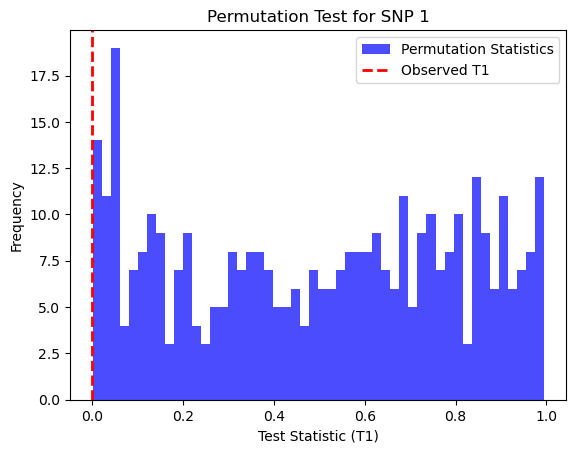

In [15]:
plt.hist(results.pvalues, bins=50,color='blue', alpha=0.7, label='Permutation Statistics')
plt.axvline(0.00013089, color='red', linestyle='dashed', linewidth=2, label='Observed T1')
plt.xlabel('Test Statistic (T1)')
plt.ylabel('Frequency')
plt.legend()
plt.title('Permutation Test for SNP 1')
plt.show()

[257]
500
500
500


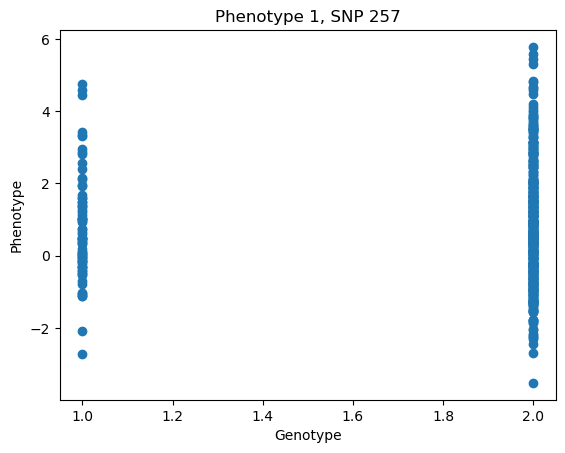

In [114]:
p_values = results2.pvalues  # Exclude intercept term
adjusted_p_values = sm.stats.multipletests(p_values, method="bonferroni")[1]

    # Identify associated SNPs
associated_snps = [j for j in range(len(adjusted_p_values)) if adjusted_p_values[j] < 0.05]

print(associated_snps)
print(len(genos))
print(len(genos[:,256]))
print(len(y2))

plt.scatter(genos[:,256], y2)
plt.title(f"Phenotype {1}, SNP {257}")
plt.xlabel("Genotype")
plt.ylabel("Phenotype")
plt.show()

In [119]:
for i in range(len(results1.pvalues)):
    if results1.pvalues[i] <= 0.00013089:
        print("1", i)
    if results2.pvalues[i] <= 0.00013089:
        print("2", i)
    if results3.pvalues[i] <= 0.00013089:
        print("3", i)
    if results4.pvalues[i] <= 0.00013089:
        print("4", i)
        
        
print(results4.pvalues[42])

4 42
3 118
2 257
6.102097417713066e-06


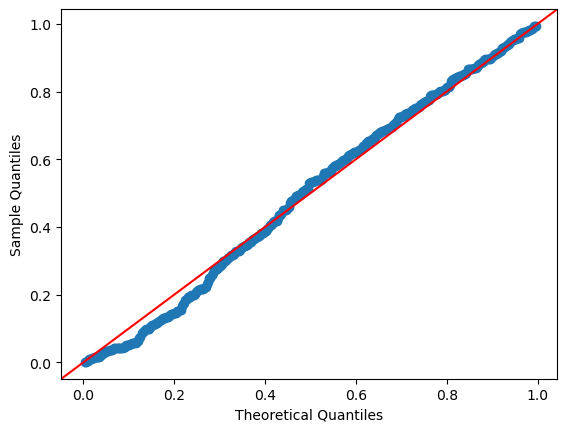

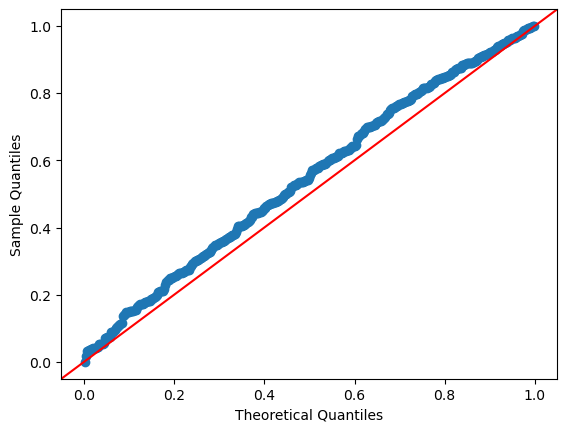

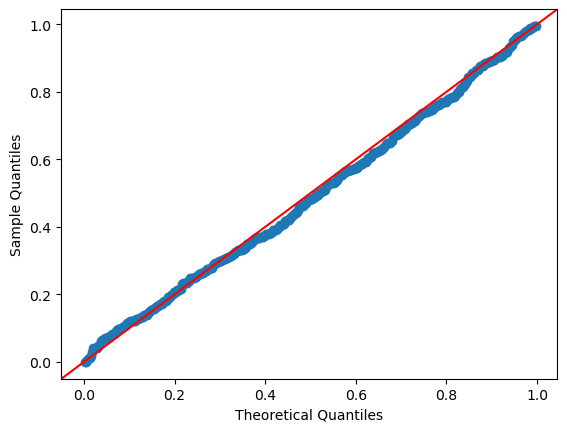

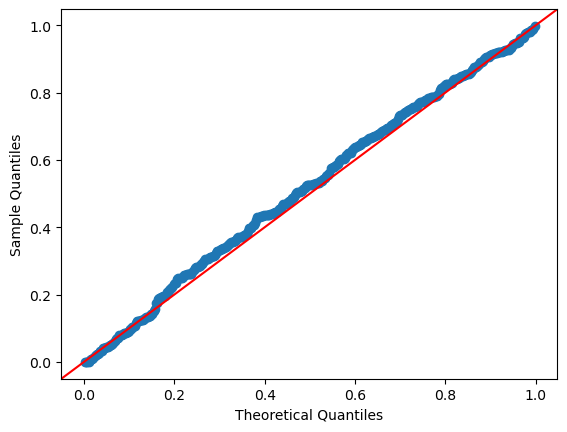

In [91]:
sm.qqplot(results1.pvalues, scipy.stats.distributions.uniform, line="45")
pylab.show()

sm.qqplot(results2.pvalues, scipy.stats.distributions.uniform, line="45")
pylab.show()

sm.qqplot(results3.pvalues, scipy.stats.distributions.uniform, line="45")
pylab.show()

sm.qqplot(results4.pvalues, scipy.stats.distributions.uniform, line="45")
pylab.show()

500


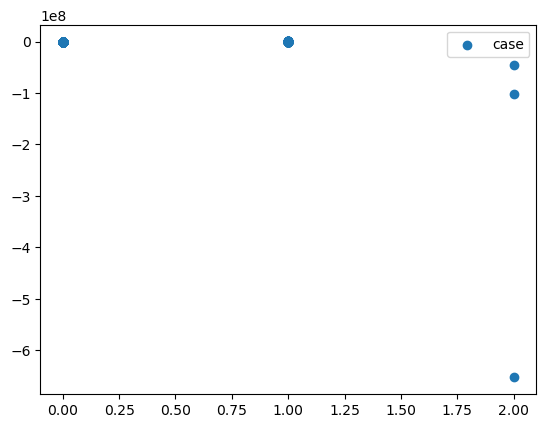

In [123]:
X = genos[:,42]
y = y4

def plot_scatter(X, y):
    class_ids = np.unique(y)
    #plt.scatter(X[np.where(y == class_ids[0]),0], X[np.where(y == class_ids[0]),1], label = "case")
    #plt.scatter(X[np.where(y == class_ids[1]),0], X[np.where(y == class_ids[1]),1], label = "control")
    
    plt.scatter(X, y, label = "case")
    
    plt.legend()
    plt.show()

print(len(X))
plot_scatter(X, y)

In [156]:
#q4

#read files
genos = np.loadtxt(r"C:\Users\ka7he\Downloads\PS2\PS2\data\PS2_Q4_data\ridge.test.geno")
#X = genos[:,0]

phenos = np.loadtxt(r"C:\Users\ka7he\Downloads\PS2\PS2\data\PS2_Q4_data\ridge.test.pheno")

1.4962444207127597e-09
592.6647624659279
1.4962444207127597e-09 592.6647624659279
0.0059441482746009945
592.7940788458632
0.0059441482746009945 592.7940788458632
0.036772995340147864
592.9876344840981
0.036772995340147864 592.9876344840981
0.09318654024592331
593.1805604517107
0.09318654024592331 593.1805604517107


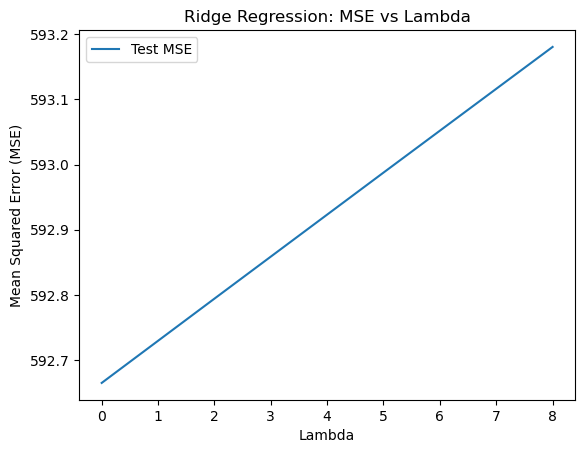

In [167]:
model = Ridge(alpha=1.0)
model.fit(genos, phenos)

X_train, X_test, y_train, y_test = train_test_split(genos, phenos, random_state=104, test_size=0.5)

lambda_values = [0.001, 2, 5, 8]

mse_train = []
mse_test = []

for lam in lambda_values:
    # Fit ridge regression model
    ridge_model = Ridge(alpha=lam)
    ridge_model.fit(X_train, y_train)
    
    # Predictions on training data
    y_train_pred = ridge_model.predict(X_train)
    print(mean_squared_error(y_train, y_train_pred))
    
    # Predictions on test data
    y_test_pred = ridge_model.predict(X_test)
    print(mean_squared_error(y_test, y_test_pred))
    
    # Calculate MSE for training and test data
    MSE1 = np.square(np.subtract(y_train,y_train_pred)).mean() 
    MSE2 = np.square(np.subtract(y_test,y_test_pred)).mean() 
    print(MSE1, MSE2)
    mse_train.append(MSE1)
    mse_test.append(MSE2)
    
#plt.plot(lambda_values, mse_train, label='Training MSE')
plt.plot(lambda_values, mse_test, label='Test MSE')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Ridge Regression: MSE vs Lambda')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mean = mean_squared_error(y_test, pred) 